<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Exploration + Data preprocessing
</h1>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Getting to know the Data 

In [61]:
data = pd.read_csv('FlightsDB.csv', parse_dates=['Snapshot Time', 'Departure Date', 'Return Date'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540000 entries, 0 to 539999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             540000 non-null  object        
 1   Destination                        540000 non-null  object        
 2   TTT                                540000 non-null  int64         
 3   LOS                                540000 non-null  int64         
 4   Departure Time                     540000 non-null  object        
 5   Departure Date                     540000 non-null  datetime64[ns]
 6   Arrival Time                       540000 non-null  object        
 7   Return Departure Time              540000 non-null  object        
 8   Return Date                        540000 non-null  datetime64[ns]
 9   Return Arrival Time                540000 non-null  object        
 10  Onward Departure Air

In [62]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')

In [63]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 540000, Columns: 29


In [64]:
print(data.isnull().sum())

Origin                                    0
Destination                               0
TTT                                       0
LOS                                       0
Departure Time                            0
Departure Date                            0
Arrival Time                              0
Return Departure Time                     0
Return Date                               0
Return Arrival Time                       0
Onward Departure Airport                  0
Onward Arrival Airport                    0
Return Departure Airport                  0
Return Arrival Airport                    0
Onward Airlines                           0
Return Airlines                           0
Onward Flight Connections                 0
Onward Connection Duration(min)           0
Onward Flight Connection Airport     537245
Return Flight Connections                 0
Return Connection Duration(min)           0
Return Flight Connection Airport     537128
Carry-ons                       

In [65]:
data.head(5)

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,688,2025-03-06,Kayak,150,170
1,London,Rome,1,1,9:10,2025-03-07,12:40,6:35,2025-03-08,8:25,...,0,0,NaN,0,0,726,2025-03-06,Kayak,150,170
2,London,Rome,1,1,9:20,2025-03-07,12:50,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,752,2025-03-06,Kayak,150,170
3,London,Rome,1,1,9:05,2025-03-07,12:35,11:05,2025-03-08,12:50,...,0,0,NaN,0,0,782,2025-03-06,Kayak,150,165
4,London,Rome,1,1,9:10,2025-03-07,12:40,6:45,2025-03-08,8:35,...,0,0,NaN,0,0,771,2025-03-06,Kayak,150,170


In [66]:
data.describe()

,TTT,LOS,Departure Date,Return Date,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Total Onward Flight Duration(min),Total Return Flight Duration(min)
count,540000.000000,540000.000000,540000,540000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000,540000.000000,540000.000000
mean,15.500000,3.000000,2025-03-23 20:00:00.000000512,2025-03-26 19:59:59.999999744,0.005148,0.911606,0.005393,1.040463,0.114917,0.007333,609.968856,2025-03-08 08:00:00,121.390337,121.632189
min,1.000000,1.000000,2025-03-07 00:00:00,2025-03-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,2025-03-06 00:00:00,60.000000,60.000000
25%,8.000000,2.000000,2025-03-16 00:00:00,2025-03-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,2025-03-06 00:00:00,80.000000,80.000000
50%,15.500000,3.000000,2025-03-24 00:00:00,2025-03-27 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,592.000000,2025-03-09 00:00:00,130.000000,130.000000
75%,23.000000,4.000000,2025-03-31 00:00:00,2025-04-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,740.000000,2025-03-10 00:00:00,150.000000,150.000000
max,30.000000,5.000000,2025-04-09 00:00:00,2025-04-14 00:00:00,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,2810.000000,2025-03-10 00:00:00,2460.000000,2530.000000
std,8.655449,1.414215,NaN,NaN,0.072210,21.541368,0.074241,23.917243,0.318922,0.090359,235.259242,NaN,44.691912,46.554233


# Data Preparation

In [67]:
data_copy = data.copy()

#### Converting Dates and Times and Calculating Additional Computed Fields Based on Date and Time Values


In [68]:
# Convert date columns to datetime format
date_columns = ['Departure Date', 'Return Date']
for col in date_columns:
    data_copy[col] = pd.to_datetime(data_copy[col], errors='coerce', dayfirst=True)

# Convert time columns to string format
time_columns = ['Departure Time', 'Return Departure Time', 'Arrival Time', 'Return Arrival Time']
for col in time_columns:
    data_copy[col] = data_copy[col].astype(str)

In [69]:
# Merge date and time columns to create new datetime columns
data_copy['Departure DateTime String'] = data_copy['Departure Date'].dt.strftime('%Y-%m-%d') + ' ' + data_copy['Departure Time']
data_copy['Return DateTime String'] = data_copy['Return Date'].dt.strftime('%Y-%m-%d') + ' ' + data_copy['Return Departure Time']

# Convert the merged strings to datetime format
data_copy['Departure DateTime'] = pd.to_datetime(data_copy['Departure DateTime String'], format='%Y-%m-%d %H:%M', errors='coerce')
data_copy['Return DateTime'] = pd.to_datetime(data_copy['Return DateTime String'], format='%Y-%m-%d %H:%M', errors='coerce')

# Remove unnecessary string columns
data_copy.drop(columns=['Departure DateTime String', 'Return DateTime String'], inplace=True)

In [70]:
# Ensure datetime format for merging
data_copy['Departure Date String'] = data_copy['Departure DateTime'].dt.strftime('%Y-%m-%d')
data_copy['Return Date String'] = data_copy['Return DateTime'].dt.strftime('%Y-%m-%d')

# Merge date and time columns efficiently
data_copy['Arrival DateTime'] = pd.to_datetime(
    data_copy['Departure Date String'] + ' ' + data_copy['Arrival Time'], errors='coerce'
)

data_copy['Return Arrival DateTime'] = pd.to_datetime(
    data_copy['Return Date String'] + ' ' + data_copy['Return Arrival Time'], errors='coerce'
)

# Drop unnecessary columns
data_copy.drop(columns=['Departure Date String', 'Return Date String', 'Arrival Time', 'Return Arrival Time'], inplace=True)

In [71]:
# Extract important time features (year, month, day, hour, weekday - adjusted to start from Sunday)
data_copy['Departure Year'] = data_copy['Departure DateTime'].dt.year
data_copy['Departure Month'] = data_copy['Departure DateTime'].dt.month
data_copy['Departure Day'] = data_copy['Departure DateTime'].dt.day
data_copy['Departure Hour'] = data_copy['Departure DateTime'].dt.hour
data_copy['Departure Weekday'] = (data_copy['Departure DateTime'].dt.weekday + 1) % 7  # Sunday=0, Saturday=6

data_copy['Return Year'] = data_copy['Return DateTime'].dt.year
data_copy['Return Month'] = data_copy['Return DateTime'].dt.month
data_copy['Return Day'] = data_copy['Return DateTime'].dt.day
data_copy['Return Hour'] = data_copy['Return DateTime'].dt.hour
data_copy['Return Weekday'] = (data_copy['Return DateTime'].dt.weekday + 1) % 7  # Sunday=0, Saturday=6


In [72]:
# Function to categorize hours
def categorize_hour(hour):
    if pd.isna(hour):  # Preserve missing values
        return None
    if 0 <= hour <= 5:
        return 'Night'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

data_copy['Departure Time Category'] = data_copy['Departure Hour'].apply(categorize_hour)
data_copy['Return Time Category'] = data_copy['Return Hour'].apply(categorize_hour)

# Convert time categories to numeric values
time_category_mapping = {
    'Night': 0,      # 00:00 - 05:59
    'Morning': 1,    # 06:00 - 11:59
    'Afternoon': 2,  # 12:00 - 17:59
    'Evening': 3     # 18:00 - 23:59
}

data_copy['Departure Time Category Num'] = data_copy['Departure Time Category'].map(time_category_mapping)
data_copy['Return Time Category Num'] = data_copy['Return Time Category'].map(time_category_mapping)


In [73]:
# Remove old columns that are no longer needed (keeping only DateTime columns)
data_copy.drop(columns=[
    'Departure Date', 'Departure Time', 'Return Date', 'Return Departure Time', 
    'Departure Hour', 'Return Hour', 'Departure Time Category', 'Return Time Category'
], inplace=True)

# Final checks
print("📌 Time category mapping:")
print(time_category_mapping)

display(data_copy[['Departure Year', 'Departure Month', 'Departure Day', 'Departure Time Category Num', 'Departure Weekday']].head(10))
display(data_copy[['Return Year', 'Return Month', 'Return Day', 'Return Time Category Num', 'Return Weekday']].head(10))

print("📌 Value counts per time category:")
print(data_copy['Departure Time Category Num'].value_counts(dropna=False))
print(data_copy['Return Time Category Num'].value_counts(dropna=False))

# 🚀 All set! 🎯


📌 Time category mapping:
{'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}


,Departure Year,Departure Month,Departure Day,Departure Time Category Num,Departure Weekday
0,2025,3,7,1,5
1,2025,3,7,1,5
2,2025,3,7,1,5
3,2025,3,7,1,5
4,2025,3,7,1,5
5,2025,3,7,1,5
6,2025,3,7,1,5
7,2025,3,7,1,5
8,2025,3,7,1,5
9,2025,3,7,1,5


,Return Year,Return Month,Return Day,Return Time Category Num,Return Weekday
0,2025,3,8,1,6
1,2025,3,8,1,6
2,2025,3,8,1,6
3,2025,3,8,1,6
4,2025,3,8,1,6
5,2025,3,8,1,6
6,2025,3,8,1,6
7,2025,3,8,3,6
8,2025,3,8,1,6
9,2025,3,8,1,6


📌 Value counts per time category:
Departure Time Category Num
1    230636
2    182223
3    125242
0      1899
Name: count, dtype: int64
Return Time Category Num
1    230704
2    176203
3    131102
0      1991
Name: count, dtype: int64


In [74]:
# Display 5 random rows
display(data_copy.sample(5))

,Origin,Destination,TTT,LOS,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,Onward Airlines,Return Airlines,...,Departure Year,Departure Month,Departure Day,Departure Weekday,Return Year,Return Month,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num
437762,Rome,Paris,18,4,FCO,ORY,ORY,FCO,easyJet,easyJet,...,2025,3,28,5,2025,4,1,2,3,2
408101,Paris,Rome,19,1,CDG,FCO,FCO,CDG,ITA Airways,ITA Airways,...,2025,3,29,6,2025,3,30,0,1,2
129714,Paris,Rome,10,4,ORY,FCO,FCO,ORY,easyJet,Wizz Air,...,2025,3,16,0,2025,3,20,4,2,1
247659,London,Paris,4,5,LGW,ORY,CDG,LTN,Vueling,easyJet,...,2025,3,13,4,2025,3,18,2,2,1
523685,Paris,London,20,2,CDG,LGW,LGW,CDG,easyJet,easyJet,...,2025,3,30,0,2025,4,1,2,3,1


In [75]:
# Mapping weekdays: 0 = Midweek (Monday-Thursday), 1 = Weekend (Friday-Sunday)
weekend_mapping = {0: 0, 1: 0, 2: 0, 3: 0,  # Monday-Thursday = 0 (Midweek)
                   4: 1, 5: 1, 6: 1}        # Friday-Sunday = 1 (Weekend)

# Create the new column based on the mapping
data_copy['Is Weekend Flight'] = data_copy['Departure Weekday'].map(weekend_mapping)

# Verify the result
print(data_copy[['Departure Weekday', 'Is Weekend Flight']].head())


   Departure Weekday  Is Weekend Flight
0                  5                  1
1                  5                  1
2                  5                  1
3                  5                  1
4                  5                  1


In [76]:
# Count the number of midweek and weekend flights
weekend_flight_counts = data_copy['Is Weekend Flight'].value_counts()

# Print the results in a readable format
print(f"🔹 Midweek flights: {weekend_flight_counts.get(0, 0)}")
print(f"🔹 Weekend flights: {weekend_flight_counts.get(1, 0)}")

🔹 Midweek flights: 312000
🔹 Weekend flights: 228000


### Handling the 'Site' Column


In [77]:
# Check unique values in the 'Site' column before mapping
print(data_copy['Site'].unique())

['Kayak' 'Momondo']


In [78]:
# Check unique values in the 'Site' column before mapping
print(data_copy['Site'].unique())

['Kayak' 'Momondo']


### Adding Airport Distance from City Center


In [79]:
# Step 1: Update the dictionary with airport information including SOU
airports_info = {
    'London': {
        'Heathrow': {'code': 'LHR', 'distance_from_city_center(km)': '23'},
        'Gatwick': {'code': 'LGW', 'distance_from_city_center(km)': '45'},
        'Stansted': {'code': 'STN', 'distance_from_city_center(km)': '64'},
        'Luton': {'code': 'LTN', 'distance_from_city_center(km)': '56'},
        'City': {'code': 'LCY', 'distance_from_city_center(km)': '11'},
        'Southend': {'code': 'SEN', 'distance_from_city_center(km)': '64'},
        'Southampton': {'code': 'SOU', 'distance_from_city_center(km)': '110'},  # Added SOU
    },
    'Rome': {
        'Fiumicino': {'code': 'FCO', 'distance_from_city_center(km)': '32'},
        'Ciampino': {'code': 'CIA', 'distance_from_city_center(km)': '15'},
    },
    'Paris': {
        'Charles de Gaulle': {'code': 'CDG', 'distance_from_city_center(km)': '25'},
        'Orly': {'code': 'ORY', 'distance_from_city_center(km)': '13'},
        'Beauvais-Tille': {'code': 'BVA', 'distance_from_city_center(km)': '85'},
    }
}


In [80]:
# Step 2: Create a dictionary to translate from airport code to distance from city center
airport_distances = {}

for city, airports in airports_info.items():
    for airport_name, details in airports.items():
        if 'distance_from_city_center(km)' in details:
            if 'code' in details:
                airport_code = details['code'].upper()  # Convert code to uppercase
                airport_distances[airport_code] = float(details['distance_from_city_center(km)'])  # Convert to float


In [81]:
# Step 3: Function to get the distance by airport code
def get_airport_distance(airport):
    if pd.isna(airport):  # If the value is missing, return None
        return None
    return airport_distances.get(airport.upper(), None)  # Compare by code in uppercase


In [82]:
# Step 4: Add the distances for each airport in the table
data_copy['Onward Departure Airport Distance'] = data_copy['Onward Departure Airport'].apply(get_airport_distance)
data_copy['Onward Arrival Airport Distance'] = data_copy['Onward Arrival Airport'].apply(get_airport_distance)
data_copy['Return Departure Airport Distance'] = data_copy['Return Departure Airport'].apply(get_airport_distance)
data_copy['Return Arrival Airport Distance'] = data_copy['Return Arrival Airport'].apply(get_airport_distance)


In [83]:
# Step 5: Check to ensure the process worked
print("Check unique values in the distance columns:")
print(data_copy[['Onward Departure Airport Distance', 'Onward Arrival Airport Distance',
                 'Return Departure Airport Distance', 'Return Arrival Airport Distance']].isnull().sum())  # Ensure no NaN values


Check unique values in the distance columns:
Onward Departure Airport Distance    473
Onward Arrival Airport Distance      473
Return Departure Airport Distance    497
Return Arrival Airport Distance      499
dtype: int64


In [84]:
# Step 6: Show examples for verification
print("Examples after the fix:")
display(data_copy[['Onward Departure Airport', 'Onward Departure Airport Distance',
                 'Onward Arrival Airport', 'Onward Arrival Airport Distance',
                 'Return Departure Airport', 'Return Departure Airport Distance',
                 'Return Arrival Airport', 'Return Arrival Airport Distance']].sample(10))

# All cleaned up!


Examples after the fix:


,Onward Departure Airport,Onward Departure Airport Distance,Onward Arrival Airport,Onward Arrival Airport Distance,Return Departure Airport,Return Departure Airport Distance,Return Arrival Airport,Return Arrival Airport Distance
522797,LTN,56.0,CDG,25.0,CDG,25.0,LGW,45.0
169961,FCO,32.0,ORY,13.0,ORY,13.0,FCO,32.0
412122,ORY,13.0,FCO,32.0,FCO,32.0,BVA,85.0
375939,STN,64.0,CIA,15.0,CIA,15.0,STN,64.0
3474,STN,64.0,CIA,15.0,FCO,32.0,LGW,45.0
142451,CDG,25.0,LTN,56.0,LTN,56.0,CDG,25.0
204710,FCO,32.0,LGW,45.0,LGW,45.0,FCO,32.0
142137,CDG,25.0,FCO,32.0,FCO,32.0,CDG,25.0
6349,LGW,45.0,FCO,32.0,FCO,32.0,LGW,45.0
55606,ORY,13.0,LGW,45.0,LTN,56.0,CDG,25.0


In [85]:
# Finding airport codes missing distance information
missing_airports = set()

# Check each airport column to see if it is missing distance information
for col in ['Onward Departure Airport', 'Onward Arrival Airport', 
            'Return Departure Airport', 'Return Arrival Airport']:
    missing_airports.update(data_copy[col][data_copy[col].notnull() & data_copy[f"{col} Distance"].isnull()])

# Display the list of airports missing distance information
print("📌 Airport codes with missing distance information:")
print(missing_airports)

📌 Airport codes with missing distance information:
{'PAR', 'ROM', 'LON'}


In [86]:
# קודי שדות תעופה כלליים שאינם שדות תעופה ספציפיים
general_airport_codes = {'ROM', 'PAR', 'LON'}

# סינון השורות שבהן מופיעים קודי ערים במקום שדות תעופה
problematic_rows = data_copy[
    data_copy['Onward Departure Airport'].isin(general_airport_codes) |
    data_copy['Onward Arrival Airport'].isin(general_airport_codes) |
    data_copy['Return Departure Airport'].isin(general_airport_codes) |
    data_copy['Return Arrival Airport'].isin(general_airport_codes)
]

# הצגת 10 שורות ראשונות עם הבעיה
print(problematic_rows[['Onward Departure Airport', 'Onward Arrival Airport',
                        'Return Departure Airport', 'Return Arrival Airport']].head(10))

     Onward Departure Airport Onward Arrival Airport Return Departure Airport  \
201                       LON                    PAR                      PAR   
1501                      LON                    PAR                      PAR   
1901                      LON                    PAR                      PAR   
2501                      LON                    PAR                      PAR   
3201                      LON                    PAR                      PAR   
4199                      LON                    PAR                      PAR   
4878                      LTN                    CDG                      PAR   
5674                      LTN                    CDG                      PAR   
6101                      LON                    PAR                      PAR   
6588                      LTN                    CDG                      PAR   

     Return Arrival Airport  
201                     LON  
1501                    LON  
1901              

In [87]:
# Create a dictionary with airport groups for each city
city_airports = {
    'LON': ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN'],
    'ROM': ['FCO', 'CIA'],
    'PAR': ['CDG', 'ORY', 'BVA']
}

# Calculate the average distance for each city based on its airports
city_avg_distances = {}

for city, airports in city_airports.items():
    # Average of all airports in the city
    city_avg_distances[city] = data_copy[data_copy['Onward Departure Airport'].isin(airports)]['Onward Departure Airport Distance'].mean()

# Function to replace city code with the city's average distance
def get_city_avg_distance(airport_code):
    if airport_code in city_avg_distances:
        return city_avg_distances[airport_code]  # Return the city's average distance
    return np.nan  # If it's not a city, return NaN

# List of columns where data needs to be updated
airport_columns = ['Onward Departure Airport', 'Onward Arrival Airport', 'Return Departure Airport', 'Return Arrival Airport']

# Update the distance values in the columns based on the city's average distance
for col in airport_columns:
    distance_col = f"{col} Distance"
    
    # Find the rows that contain a city code (LON, ROM, PAR)
    city_mask = data_copy[col].isin(city_airports.keys())
    
    # Update missing values with the corresponding city's average distance
    data_copy.loc[city_mask, distance_col] = data_copy.loc[city_mask, col].map(get_city_avg_distance)

# Check if there are still missing values
print("📌 Check after filling in the missing values:")
print(data_copy[['Onward Departure Airport Distance', 'Onward Arrival Airport Distance',
                 'Return Departure Airport Distance', 'Return Arrival Airport Distance']].isnull().sum())

print("✅ The distances have been updated based on the city's average distances for each airport!")

📌 Check after filling in the missing values:
Onward Departure Airport Distance    0
Onward Arrival Airport Distance      0
Return Departure Airport Distance    0
Return Arrival Airport Distance      0
dtype: int64
✅ The distances have been updated based on the city's average distances for each airport!


### Adding a Computed Field for Total Number of Connections


In [88]:
data_copy['Total Connections'] = data_copy['Onward Flight Connections'] + data_copy['Return Flight Connections']


In [89]:
data_copy.describe()

,TTT,LOS,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Snapshot Time,...,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections
count,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000,...,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000
mean,15.500000,3.000000,0.005148,0.911606,0.005393,1.040463,0.114917,0.007333,609.968856,2025-03-08 08:00:00,...,16.155556,3.008889,1.797793,1.808178,0.422222,33.572278,33.211304,33.617195,33.232995,0.010541
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,2025-03-06 00:00:00,...,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.000000
25%,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,2025-03-06 00:00:00,...,8.000000,1.000000,1.000000,1.000000,0.000000,23.000000,23.000000,23.000000,23.000000,0.000000
50%,15.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,592.000000,2025-03-09 00:00:00,...,16.500000,3.000000,2.000000,2.000000,0.000000,32.000000,32.000000,32.000000,32.000000,0.000000
75%,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,740.000000,2025-03-10 00:00:00,...,24.000000,5.000000,2.000000,2.000000,1.000000,45.000000,45.000000,45.000000,45.000000,0.000000
max,30.000000,5.000000,2.000000,1560.000000,2.000000,1785.000000,1.000000,2.000000,2810.000000,2025-03-10 00:00:00,...,31.000000,6.000000,3.000000,3.000000,1.000000,85.000000,85.000000,85.000000,85.000000,3.000000
std,8.655449,1.414215,0.072210,21.541368,0.074241,23.917243,0.318922,0.090359,235.259242,NaN,...,9.041777,2.003313,0.795118,0.804963,0.493914,16.751788,16.300154,16.845189,16.475310,0.107255


## Data Preparation Summary

- **Converted date and time columns** into proper `datetime` objects and extracted key time features.  
- **Mapped airport distances** from city centers based on airport codes.  
- **Classified flights** as midweek or weekend based on departure day.  
- **Created a computed field** for the total number of connections.  
- **Checked and mapped 'Site' values** to ensure consistency.  

The dataset is now structured and ready for analysis. 🚀

### Flight Price Outlier Analysis
Removed outliers in Price (NIS) using Tukey’s IQR method.
Visualized price distribution before and after removal.

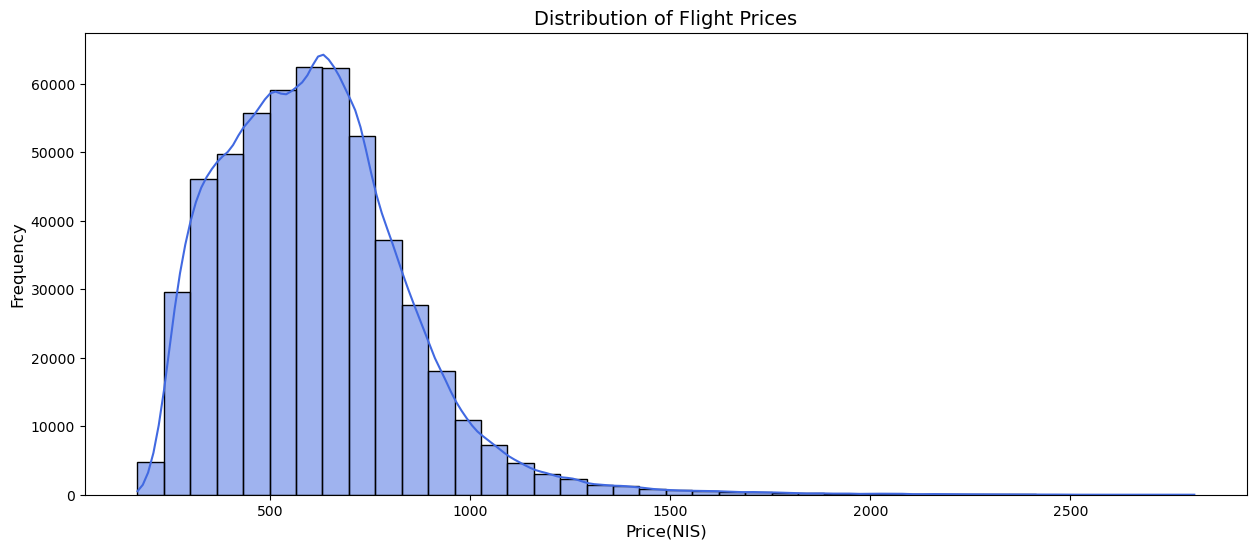

In [90]:
plt.figure(figsize=(15, 6))
sns.histplot(data["Price(NIS)"], bins=40, kde=True, color="royalblue")
plt.title("Distribution of Flight Prices", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

Original data size: (540000, 29)
Filtered data size: (529650, 43)
Percentage of removed rows: 1.92%


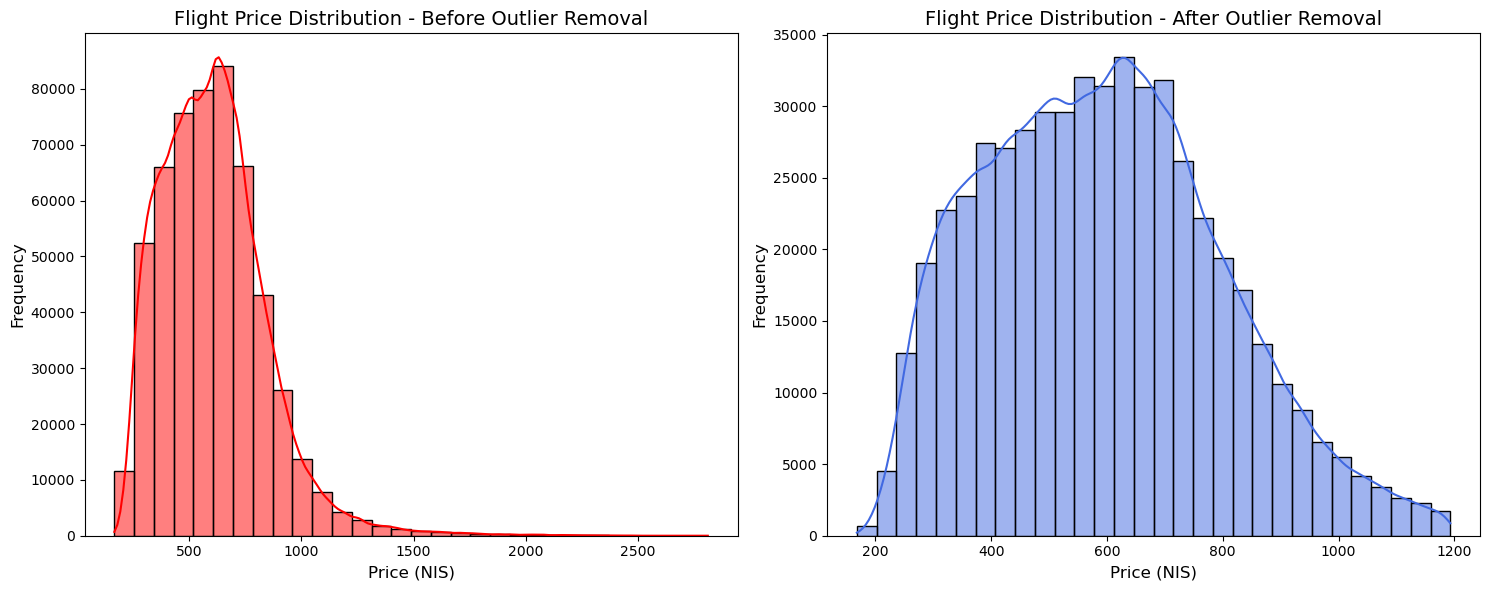

In [91]:
# Calculating quartiles and IQR for the 'Price(NIS)' column
Q1 = data_copy["Price(NIS)"].quantile(0.25)
Q3 = data_copy["Price(NIS)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ✅ Keeping the outliers in the 'Price(NIS)' column directly in data_copy
data_copy = data_copy[(data_copy["Price(NIS)"] >= lower_bound) & (data_copy["Price(NIS)"] <= upper_bound)].copy()

# Displaying the number of rows removed
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {data_copy.shape}")
removed_percentage = (1 - (data_copy.shape[0] / data.shape[0])) * 100
print(f"Percentage of removed rows: {removed_percentage:.2f}%")

# Creating histograms to compare the distribution before and after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram before outlier removal
sns.histplot(data["Price(NIS)"], bins=30, kde=True, color="red", ax=axes[0])
axes[0].set_title("Flight Price Distribution - Before Outlier Removal", fontsize=14)
axes[0].set_xlabel("Price (NIS)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Histogram after outlier removal
sns.histplot(data_copy["Price(NIS)"], bins=30, kde=True, color="royalblue", ax=axes[1])
axes[1].set_title("Flight Price Distribution - After Outlier Removal", fontsize=14)
axes[1].set_xlabel("Price (NIS)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Displaying the plots
plt.tight_layout()
plt.show()


### Visual Exploration of the Data: Understanding Key Patterns and Trends


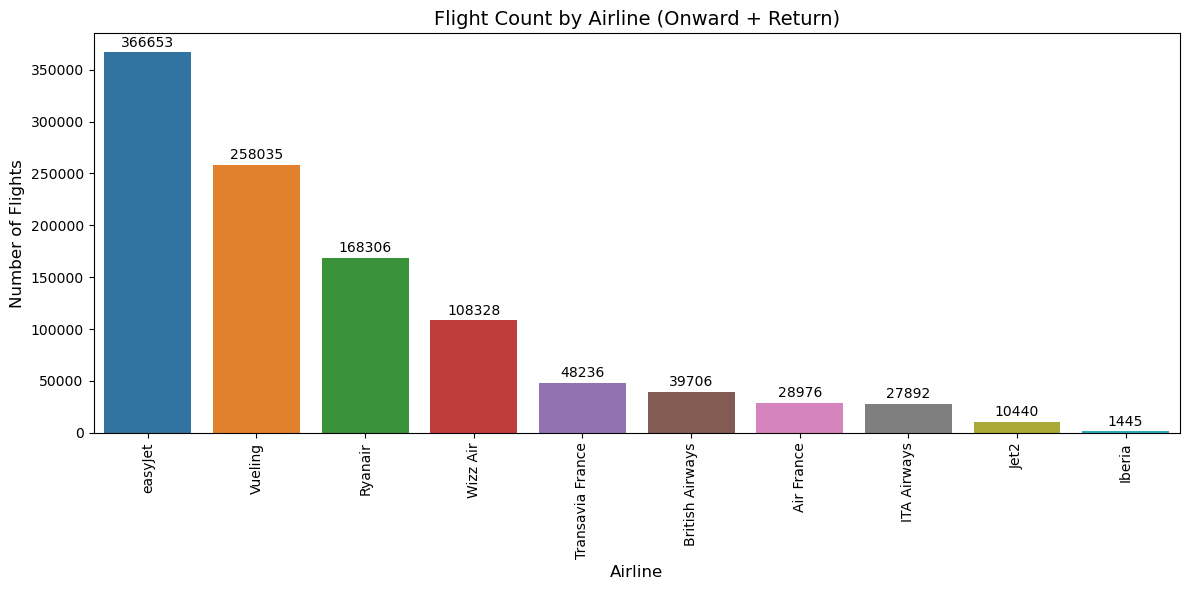

In [92]:
# 1️⃣ Create a temporary DataFrame for the chart
airlines_df = pd.DataFrame({
    'Airline': pd.concat([data_copy['Onward Airlines'], data_copy['Return Airlines']], ignore_index=True)
})

# 2️⃣ Count the number of flights for each airline
airline_counts = airlines_df['Airline'].value_counts()

# 3️⃣ Filter airlines with at least 1,000 flights
min_flights = 1000
top_airlines = airline_counts[airline_counts > min_flights].index

# 4️⃣ Filter data to include only airlines that meet the threshold
filtered_data = airlines_df[airlines_df['Airline'].isin(top_airlines)]

# 5️⃣ Create a bar chart - number of flights per airline
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=filtered_data, x="Airline", palette="tab10", order=top_airlines)

# 6️⃣ Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 7),  # Adjust spacing from bars
                textcoords='offset points',
                ha='center', va='center')

# 7️⃣ Customize titles and labels
plt.title("Flight Count by Airline (Onward + Return)", fontsize=14)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=90)  # Rotate airline names for better readability

plt.tight_layout()
plt.show()


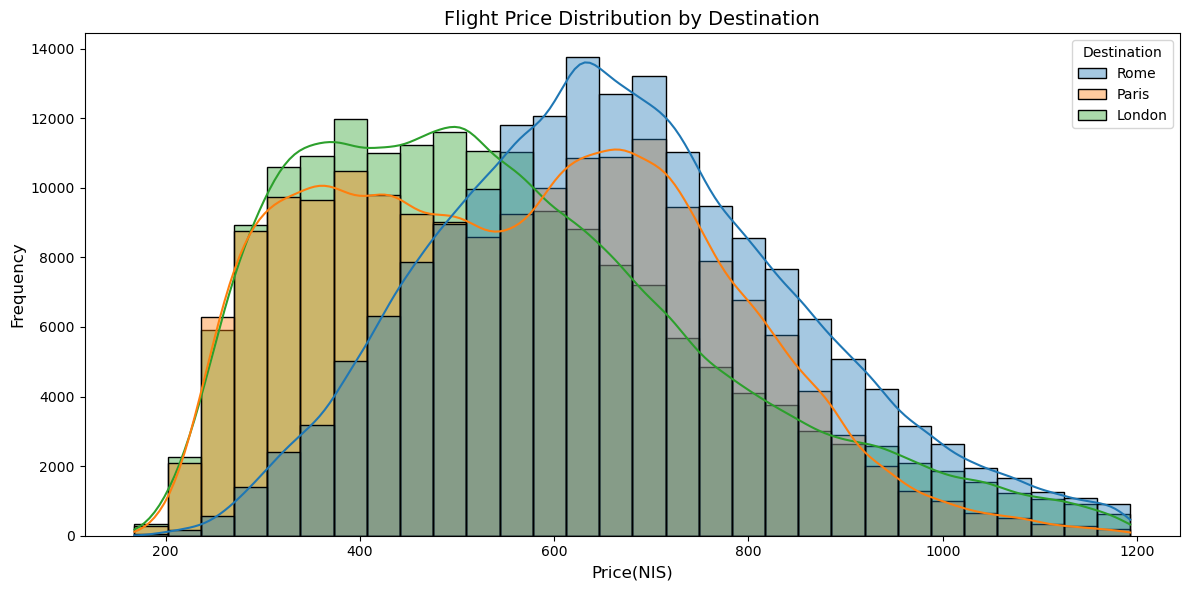

In [93]:
# 1. Create a histogram of flight prices by destination
plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Price(NIS)", hue="Destination", bins=30, kde=True, palette="tab10", alpha=0.4)

# 2. Set the title and labels for the histogram
plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 3. Display the plot
plt.tight_layout()
plt.show()


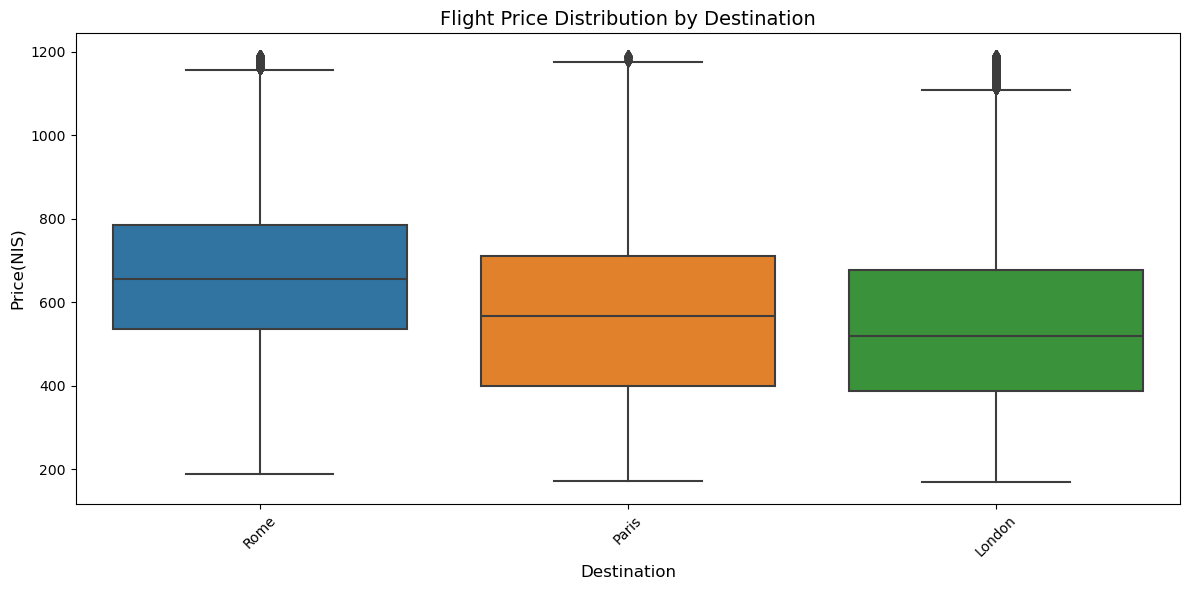

In [94]:
# Create the boxplot for flight prices by destination
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy, x="Destination", y="Price(NIS)", palette="tab10")

# Adding titles and labels
plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Price(NIS)", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


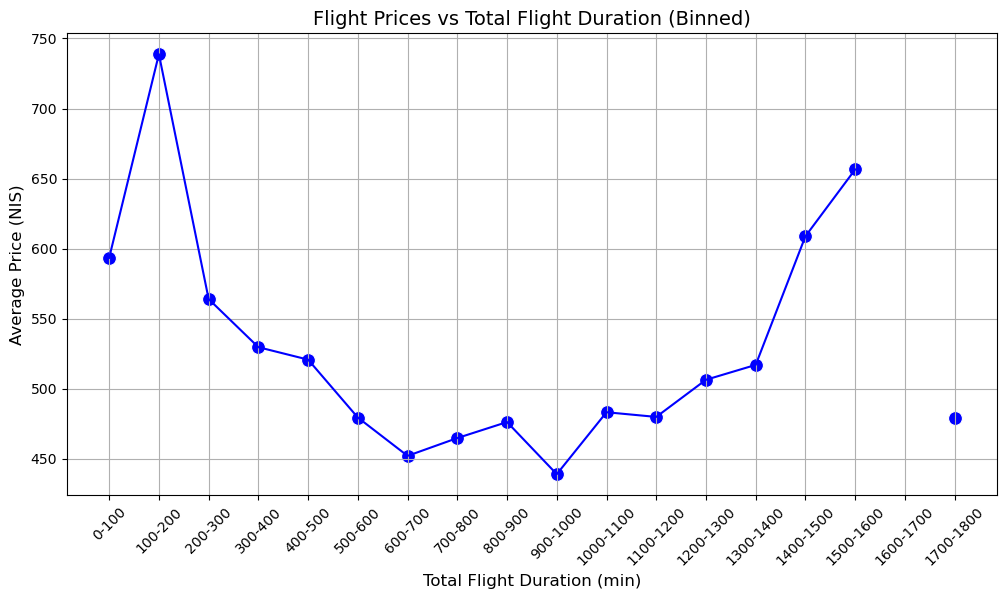

In [95]:
import numpy as np

# Create flight duration bins (fixed interval of 100 minutes)
bins = np.arange(0, data_copy['Return Connection Duration(min)'].max() + 100, 100)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
data_copy['Flight Duration Binned'] = pd.cut(data_copy['Return Connection Duration(min)'], bins=bins, labels=labels, include_lowest=True)

# Calculate the average price for each flight duration bin
avg_price_per_duration = data_copy.groupby('Flight Duration Binned')['Price(NIS)'].mean().reset_index()

# Scatter plot with connecting lines
plt.figure(figsize=(12, 6))
sns.scatterplot(data=avg_price_per_duration, x='Flight Duration Binned', y='Price(NIS)', color='blue', s=100)
plt.plot(avg_price_per_duration['Flight Duration Binned'], avg_price_per_duration['Price(NIS)'], linestyle='-', color='blue')

# Customize plot titles and labels
plt.title("Flight Prices vs Total Flight Duration (Binned)", fontsize=14)
plt.xlabel("Total Flight Duration (min)", fontsize=12)
plt.ylabel("Average Price (NIS)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [96]:
# Define known airport groupings
airport_groups = {
    'London': ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN'],
    'Rome': ['FCO', 'CIA'],
    'Paris': ['CDG', 'ORY', 'BVA']
}

# Extract all unique airports from the dataset
airport_columns = ['Onward Departure Airport', 'Onward Arrival Airport', 
                   'Return Departure Airport', 'Return Arrival Airport']

# Combine all airports into one set (to remove duplicates)
unique_airports = set(pd.concat([data_copy[col] for col in airport_columns]).dropna())

# Classify airports into known groups
classified_airports = {city: [] for city in airport_groups.keys()}
unclassified_airports = []

for airport in sorted(unique_airports):
    found = False
    for city, airport_list in airport_groups.items():
        if airport in airport_list:
            classified_airports[city].append(airport)
            found = True
            break
    if not found:
        unclassified_airports.append(airport)  # Store airports without a known city grouping

# Print formatted lists for each city
for city, airports in classified_airports.items():
    print(f"{city}_airports = {airports}")

# Print unclassified airports separately
if unclassified_airports:
    print("\nOther_airports = [")
    for airport in unclassified_airports:
        print(f"    '{airport}',")
    print("]")


London_airports = ['LCY', 'LGW', 'LHR', 'LTN', 'SEN', 'STN']
Rome_airports = ['CIA', 'FCO']
Paris_airports = ['BVA', 'CDG', 'ORY']

Other_airports = [
    'LON',
    'PAR',
    'ROM',
]


In [97]:
data_copy.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure DateTime',
       'Return DateTime', 'Arrival DateTime', 'Return Arrival DateTime',
       'Departure Year', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Year', 'Return Month', 'Return Day',
       'Return Weekday', 'Departure Time Category Num',
       'Return Time Category Num', 'Is Weekend Flight',
       'Onward Departure Airport Distance', 'Onward Arrival Airport D

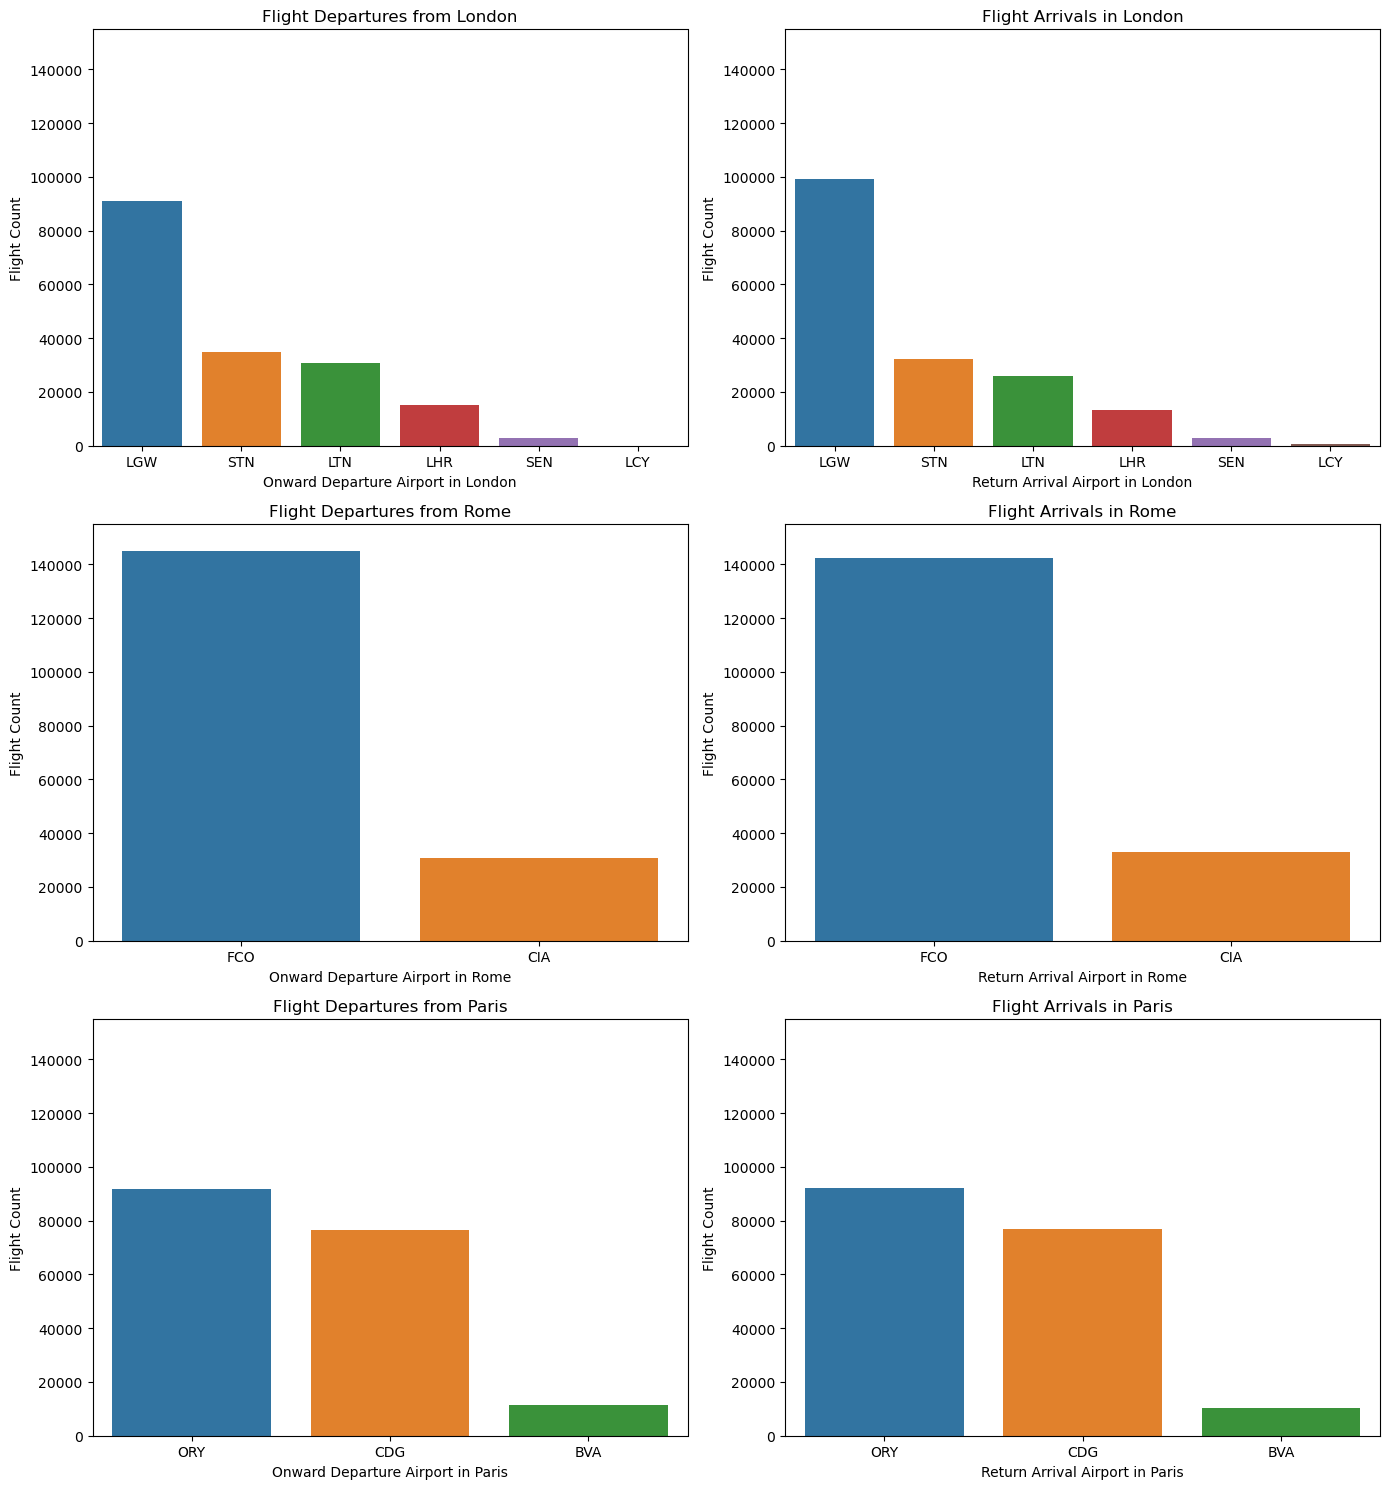

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# רשימות שדות תעופה
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']

# יצירת figure עם 6 גרפים (3 שורות, 2 עמודות)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# פונקציה ליצירת תרשים עמודות
def create_bar_plot(data, city, airport_col, title, ax):
    subset_data = data_copy[data_copy[airport_col].isin(city)]
    flight_counts = subset_data[airport_col].value_counts().reset_index()
    flight_counts.columns = [airport_col, 'Flight Count']
    sns.barplot(data=flight_counts, x=airport_col, y='Flight Count', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Flight Count")
    return flight_counts['Flight Count'].max() if not flight_counts.empty else 0

# רשימה לאחסון הערכים המקסימליים
max_values = []

# יצירת הגרפים ואיסוף מקסימום הערכים מכל הגרפים
max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0]))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1]))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0]))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1]))

max_values.append(create_bar_plot(data_copy[data_copy['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0]))
max_values.append(create_bar_plot(data_copy[data_copy['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1]))

# הגדרת ציר Y אחיד לכל הגרפים
y_max = max(max_values)
for ax in axes.flatten():
    ax.set_ylim(0, y_max+10000)

# התאמת הפריסה
plt.tight_layout()
plt.show()


⚠️ No data available for Flight Arrivals in London
⚠️ No data available for Flight Arrivals in Paris


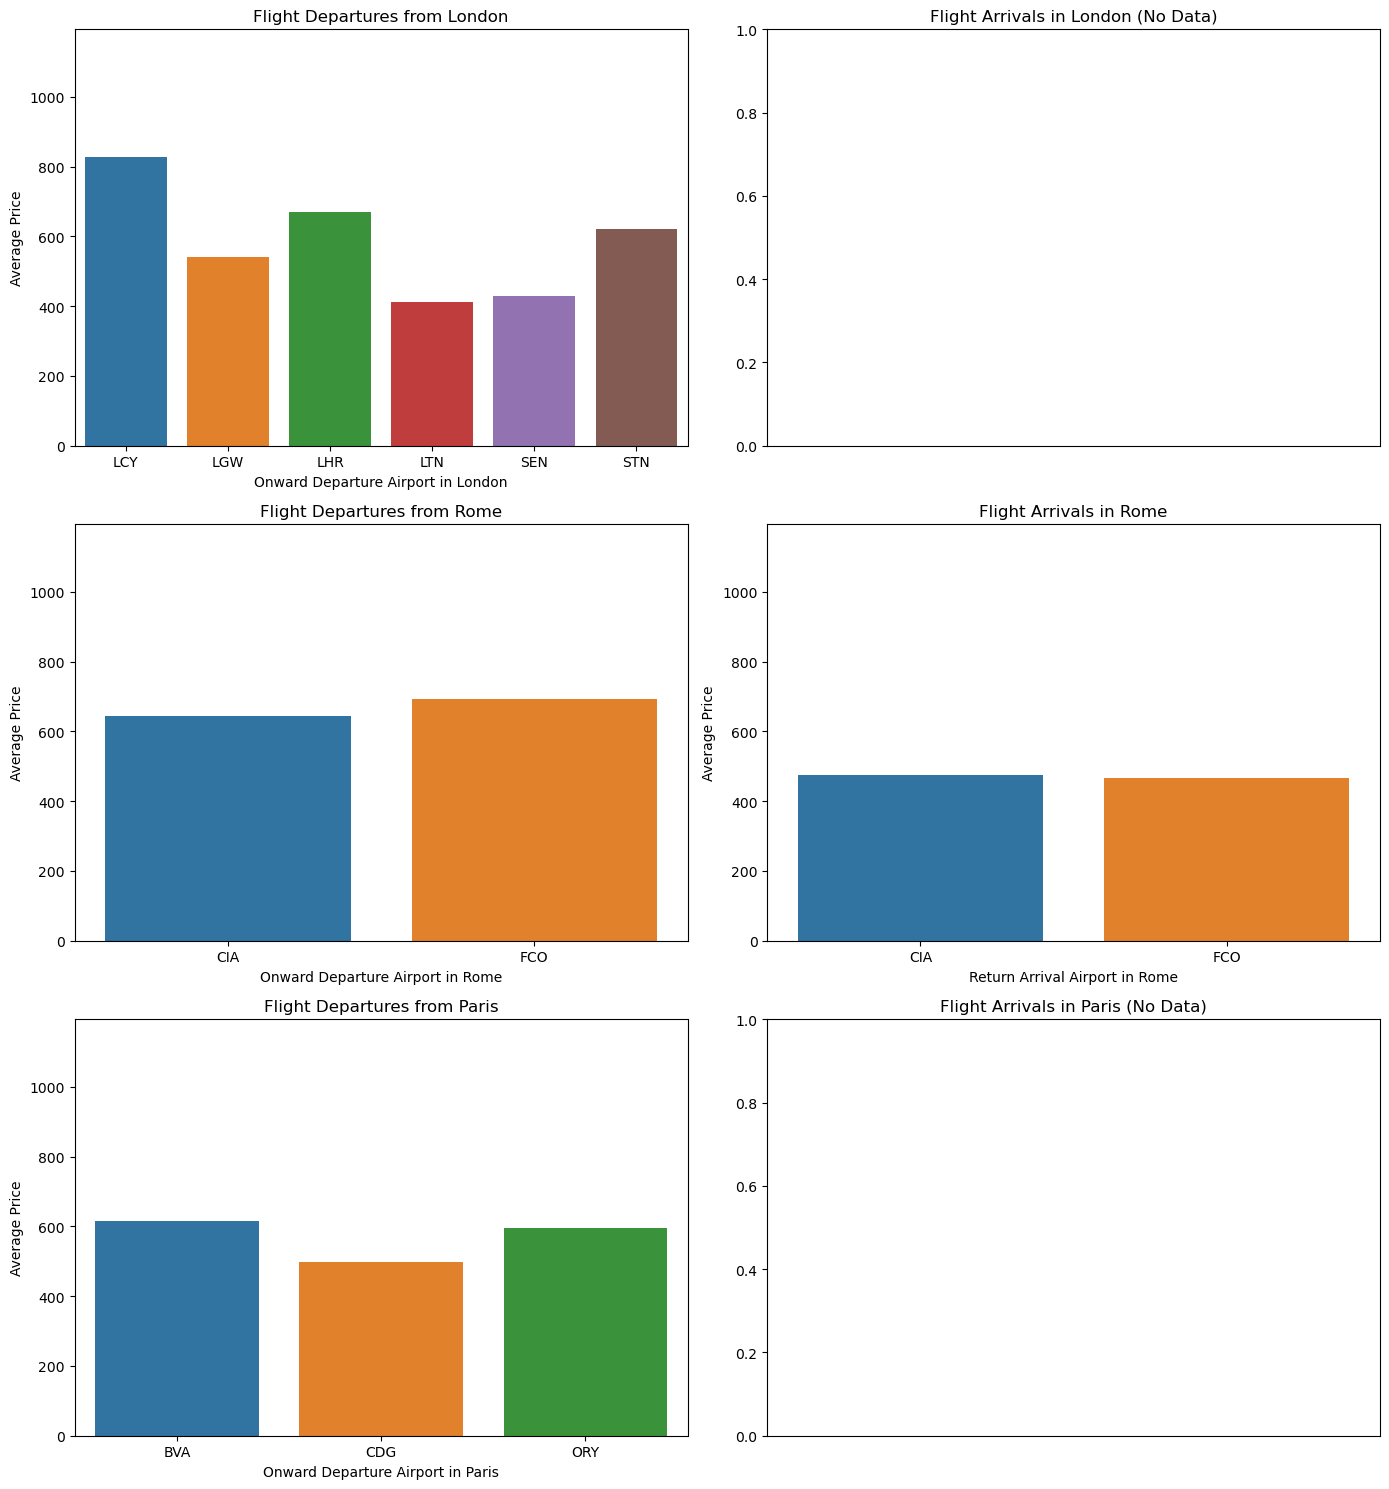

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# רשימות שדות תעופה
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']

# קביעת גבול אחיד לציר Y
max_price = data_copy['Price(NIS)'].max()

# יצירת figure עם 6 גרפים (3 שורות, 2 עמודות)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# פונקציה ליצירת תרשים עמודות
def create_bar_plot(data, city, airport_col, title, ax):
    subset_data = data[data[airport_col].isin(city)]

    # בדיקה אם יש נתונים
    if subset_data.empty:
        print(f"⚠️ No data available for {title}")
        ax.set_title(f"{title} (No Data)")
        ax.set_xticks([])  # להסתיר את הציר X במקרה שאין נתונים
        return

    avg_prices = subset_data.groupby(airport_col).agg({'Price(NIS)': 'mean'}).reset_index()

    # בדיקה אם אחרי החישוב עדיין ריק
    if avg_prices.empty:
        print(f"⚠️ No valid airport data for {title}")
        ax.set_title(f"{title} (No Data)")
        ax.set_xticks([])  
        return

    sns.barplot(data=avg_prices, x=airport_col, y='Price(NIS)', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Average Price")
    ax.set_ylim(0, max_price)

# יצירת הגרפים עם data_copy במקום filtered_data
create_bar_plot(data_copy[data_copy['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0])
create_bar_plot(data_copy[data_copy['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1])

create_bar_plot(data_copy[data_copy['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0])
create_bar_plot(data_copy[data_copy['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1])

create_bar_plot(data_copy[data_copy['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0])
create_bar_plot(data_copy[data_copy['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1])

# התאמת הפריסה
plt.tight_layout()
plt.show()


ValueError: min() arg is an empty sequence

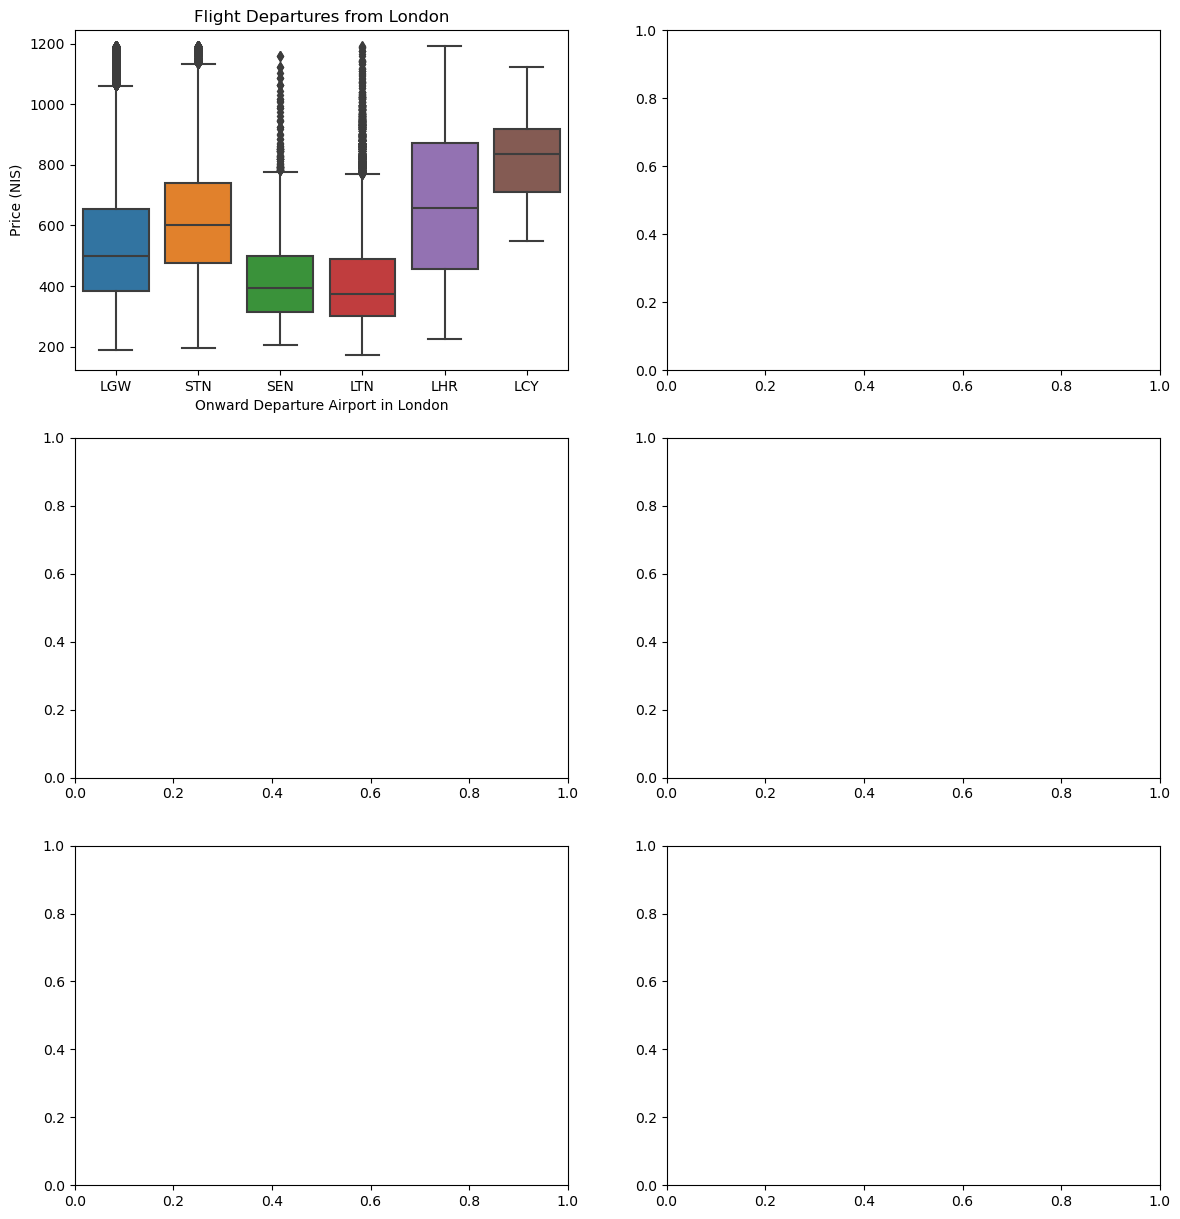

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# רשימות שדות תעופה
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']

# יצירת figure עם 6 גרפים (3 שורות, 2 עמודות)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# פונקציה ליצירת תרשימי Box Plot
def create_box_plot(data, city, airport_col, title, ax):
    subset_data = data[data[airport_col].isin(city)]
    sns.boxplot(data=subset_data, x=airport_col, y='Price(NIS)', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Price (NIS)")

# יצירת הגרפים עם data_copy במקום filtered_data
create_box_plot(data_copy[data_copy['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0])
create_box_plot(data_copy[data_copy['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1])

create_box_plot(data_copy[data_copy['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0])
create_box_plot(data_copy[data_copy['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1])

create_box_plot(data_copy[data_copy['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0])
create_box_plot(data_copy[data_copy['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1])

# התאמת הפריסה
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

In this section, we visualize key variables and examine their impact on price.  
We will explore trends, distributions, and relationships between features to gain insights into pricing patterns.

📌 Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Onward Flight Duration(min)    0.379121
Total Return Flight Duration(min)    0.353908
Carry-ons                            0.206509
Departure Month                      0.100534
Checked Bags                         0.036403
Is Weekend Flight                    0.034819
Return Month                         0.034536
Total Connections                    0.034115
Onward Flight Connections            0.027141
Return Flight Connections            0.022639
LOS                                  0.001711
Onward Connection Duration(min)     -0.002379
Return Connection Duration(min)     -0.004180
Departure Weekday                   -0.006638
Departure Time Category Num         -0.016671
TTT                                 -0.037496
Return Time Category Num            -0.039622
Return Weekday                      -0.040983
Return Departure Airport Distance   -0.069685
Return Arrival Airport

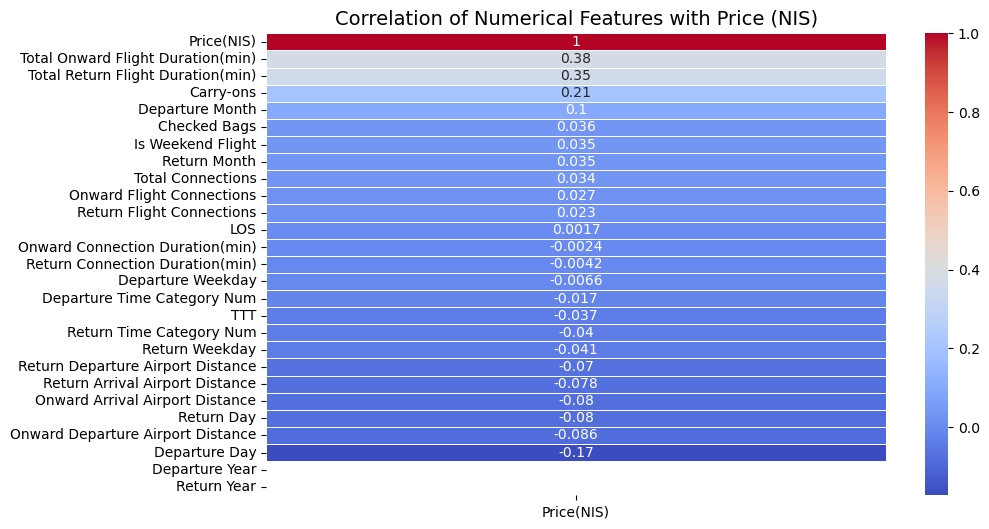

In [101]:
# Selecting only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Printing correlation of all numeric variables with flight price
print("📌 Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Price (NIS)", fontsize=14)
plt.show()


📌 Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Onward Flight Duration(min)    0.379121
Total Return Flight Duration(min)    0.353908
Carry-ons                            0.206509
Departure Month                      0.100534
Checked Bags                         0.036403
Is Weekend Flight                    0.034819
Return Month                         0.034536
Total Connections                    0.034115
Onward Flight Connections            0.027141
Return Flight Connections            0.022639
LOS                                  0.001711
Onward Connection Duration(min)     -0.002379
Return Connection Duration(min)     -0.004180
Departure Weekday                   -0.006638
Departure Time Category Num         -0.016671
TTT                                 -0.037496
Return Time Category Num            -0.039622
Return Weekday                      -0.040983
Return Departure Airport Distance   -0.069685
Return Arrival Airport

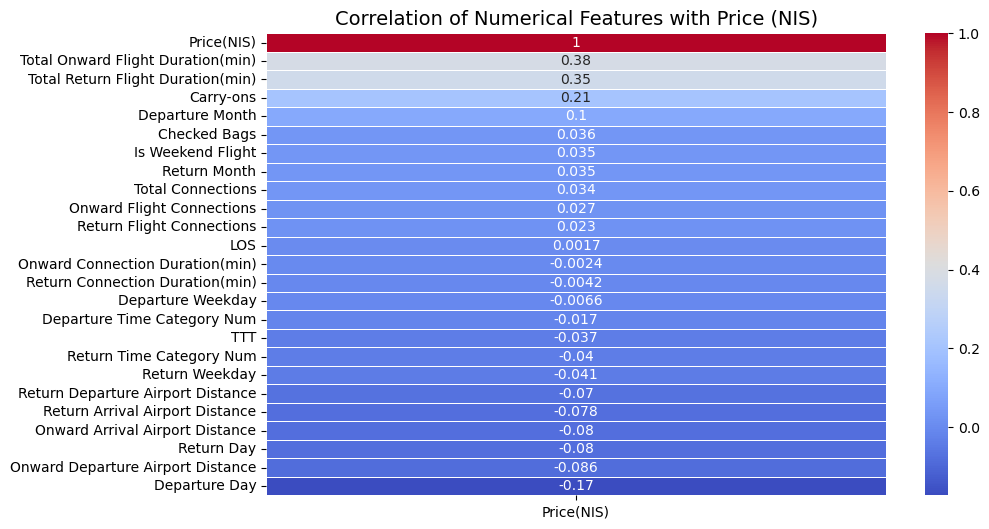

In [102]:
# Selecting only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Removing constant columns (columns with only one unique value)
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1]

# Printing correlation of all numeric variables with flight price
print("📌 Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features with Price (NIS)", fontsize=14)
plt.show()

1. **Total Onward Flight Duration (min)** – 0.38
2. **Total Return Flight Duration (min)** – 0.35
3. **Carry-ons** – 0.21
4. **Departure Month** – 0.1
5. **Checked Bags** – 0.036
6. **Is Weekend Flight** – 0.035
7. **Return Month** – 0.035
8. **Total Connections** – 0.034
9. **Onward Flight Connections** – 0.027
10. **Return Flight Connections** – 0.023


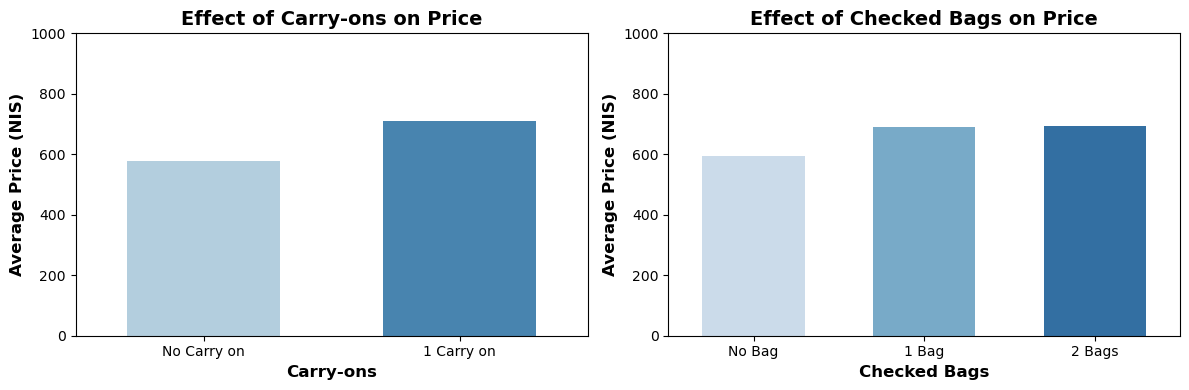

In [103]:
# Defining one figure for two plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Improved colors
palette_carryons = sns.color_palette("Blues", n_colors=2)
palette_checkedbags = sns.color_palette("Blues", n_colors=3)

# Plot for Carry-ons
sns.barplot(data=data_copy, x='Carry-ons', y='Price(NIS)', ax=axes[0], palette=palette_carryons, width=0.6, ci=None)
axes[0].set_title("Effect of Carry-ons on Price", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Carry-ons", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Average Price (NIS)", fontsize=12, fontweight="bold")
axes[0].set_xticklabels(["No Carry on", "1 Carry on"])

# Plot for Checked Bags
sns.barplot(data=data_copy, x='Checked Bags', y='Price(NIS)', ax=axes[1], palette=palette_checkedbags, width=0.6, ci=None)
axes[1].set_title("Effect of Checked Bags on Price", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Checked Bags", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Average Price (NIS)", fontsize=12, fontweight="bold")
axes[1].set_xticklabels(["No Bag", "1 Bag", "2 Bags"])

# Updating the Y-axis scale for both plots to match
axes[0].set_ylim(0, 1000)
axes[1].set_ylim(0, 1000)

# Display the plots
plt.tight_layout()
plt.show()


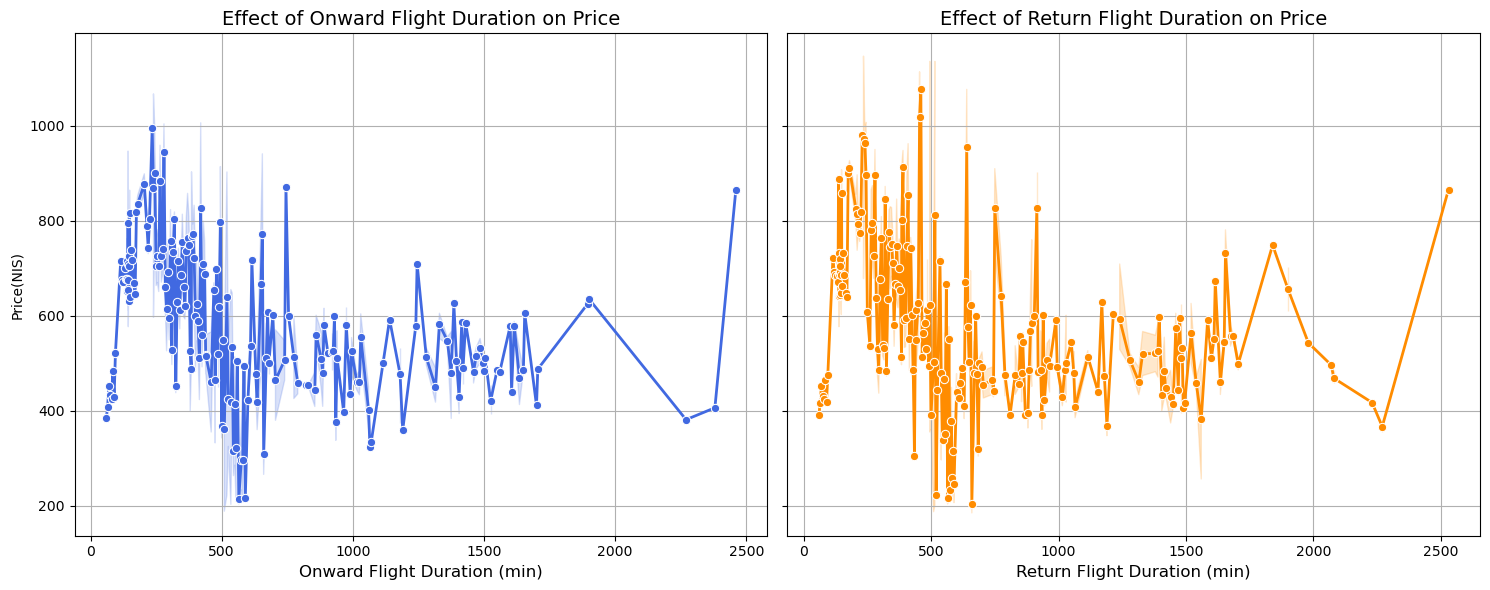

In [104]:
# Defining the figure area with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Different colors for each plot
color_onward = "royalblue"
color_return = "darkorange"

# Plot for onward flight duration
sns.lineplot(data=data_copy, x='Total Onward Flight Duration(min)', y='Price(NIS)', 
             marker="o", markersize=6, linewidth=2, color=color_onward, ax=axes[0])
axes[0].set_xlabel("Onward Flight Duration (min)", fontsize=12)
axes[0].set_title("Effect of Onward Flight Duration on Price", fontsize=14)
axes[0].grid(True)

# Plot for return flight duration
sns.lineplot(data=data_copy, x='Total Return Flight Duration(min)', y='Price(NIS)', 
             marker="o", markersize=6, linewidth=2, color=color_return, ax=axes[1])
axes[1].set_xlabel("Return Flight Duration (min)", fontsize=12)
axes[1].set_title("Effect of Return Flight Duration on Price", fontsize=14)
axes[1].grid(True)

# Adjusting the spacing between the plots
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2)

plt.tight_layout()
plt.show()

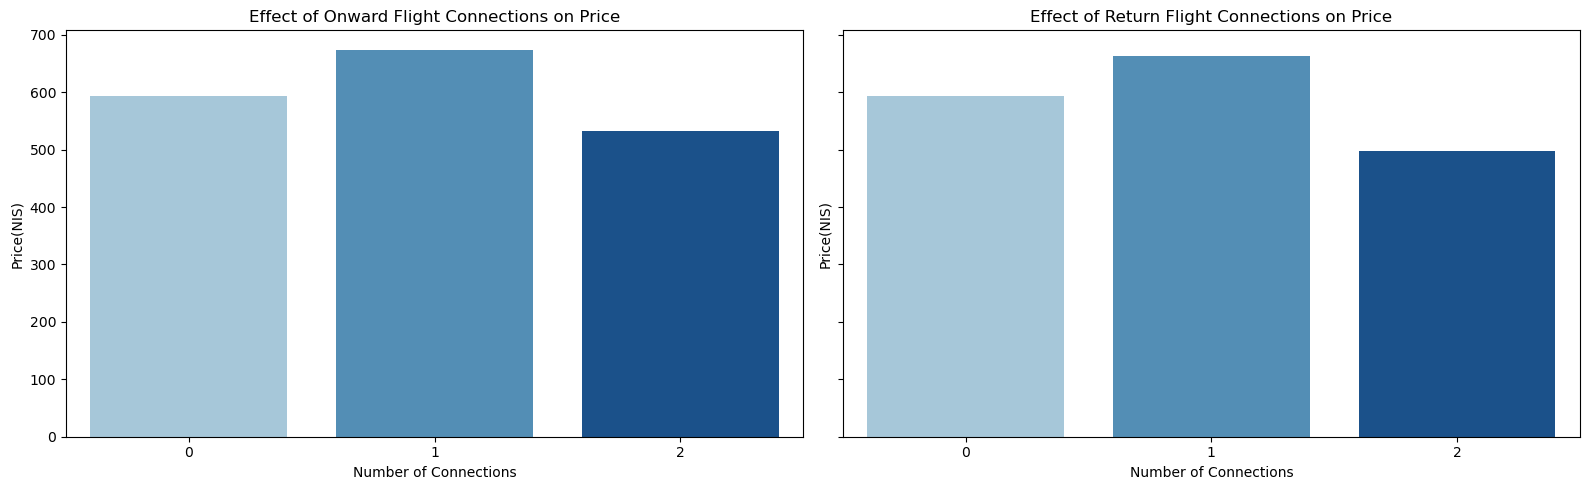

In [ ]:
# Create a single figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Shared color palette for onward and return flights
shared_palette = ["#9ecae1", "#4292c6", "#08519c"]  # Shades of blue

# Plot for the number of connections in onward flights
sns.barplot(data=data_copy, x='Onward Flight Connections', y='Price(NIS)', 
            estimator='mean', ax=axes[0], palette=shared_palette, errorbar=None)
axes[0].set_xlabel("Number of Connections")
axes[0].set_title("Effect of Onward Flight Connections on Price")

# Plot for the number of connections in return flights
sns.barplot(data=data_copy, x='Return Flight Connections', y='Price(NIS)', 
            estimator='mean', ax=axes[1], palette=shared_palette, errorbar=None)
axes[1].set_xlabel("Number of Connections")
axes[1].set_title("Effect of Return Flight Connections on Price")

# Improve the layout of the plot
plt.tight_layout()
plt.show()

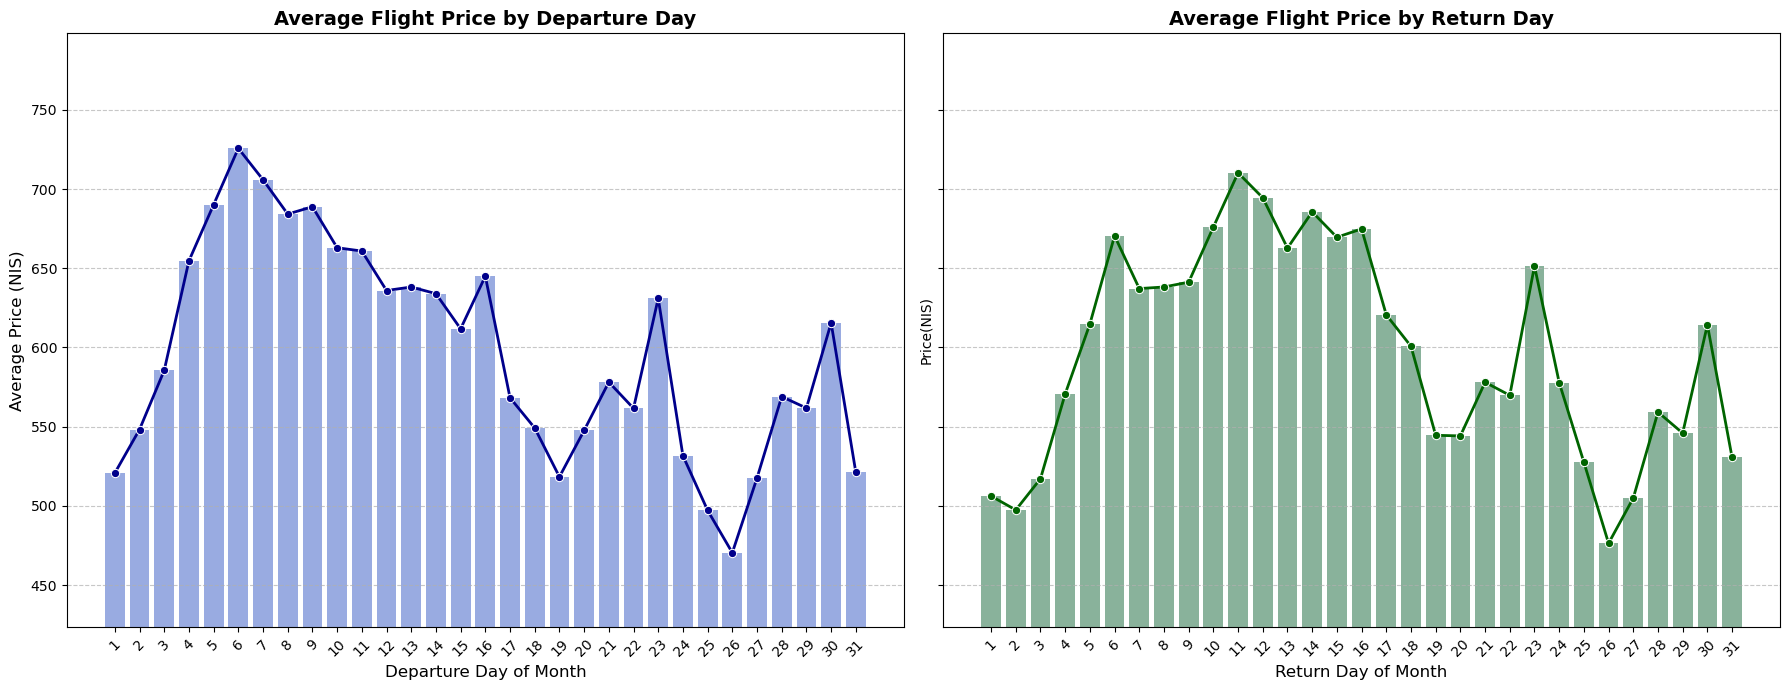

In [106]:
# Calculate average price by Departure Day and Return Day
avg_price_per_departure = data_copy.groupby('Departure Day')['Price(NIS)'].mean().reset_index()
avg_price_per_return = data_copy.groupby('Return Day')['Price(NIS)'].mean().reset_index()

# Creating indices within the DataFrame
avg_price_per_departure["Index"] = range(len(avg_price_per_departure))
avg_price_per_return["Index"] = range(len(avg_price_per_return))

# Create plots with a shared Y-axis
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Setting common Y-axis limits
y_min = min(avg_price_per_departure['Price(NIS)'].min(), avg_price_per_return['Price(NIS)'].min()) * 0.9
y_max = max(avg_price_per_departure['Price(NIS)'].max(), avg_price_per_return['Price(NIS)'].max()) * 1.1

# Departure Day plot
sns.barplot(ax=axes[0], data=avg_price_per_departure, x="Index", y="Price(NIS)", color="royalblue", alpha=0.6)
sns.lineplot(ax=axes[0], data=avg_price_per_departure, x="Index", y="Price(NIS)", color='darkblue', marker='o', linewidth=2)
axes[0].set_xticks(avg_price_per_departure["Index"])
axes[0].set_xticklabels(avg_price_per_departure["Departure Day"].astype(str), rotation=45)
axes[0].set_xlabel("Departure Day of Month", fontsize=12)
axes[0].set_ylabel("Average Price (NIS)", fontsize=12)
axes[0].set_title("Average Flight Price by Departure Day", fontsize=14, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(y_min, y_max)

# Return Day plot
sns.barplot(ax=axes[1], data=avg_price_per_return, x="Index", y="Price(NIS)", color="seagreen", alpha=0.6)
sns.lineplot(ax=axes[1], data=avg_price_per_return, x="Index", y="Price(NIS)", color='darkgreen', marker='o', linewidth=2)
axes[1].set_xticks(avg_price_per_return["Index"])
axes[1].set_xticklabels(avg_price_per_return["Return Day"].astype(str), rotation=45)
axes[1].set_xlabel("Return Day of Month", fontsize=12)
axes[1].set_title("Average Flight Price by Return Day", fontsize=14, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_ylim(y_min, y_max)

# Adjusting the layout of the plots
plt.tight_layout()
plt.show()


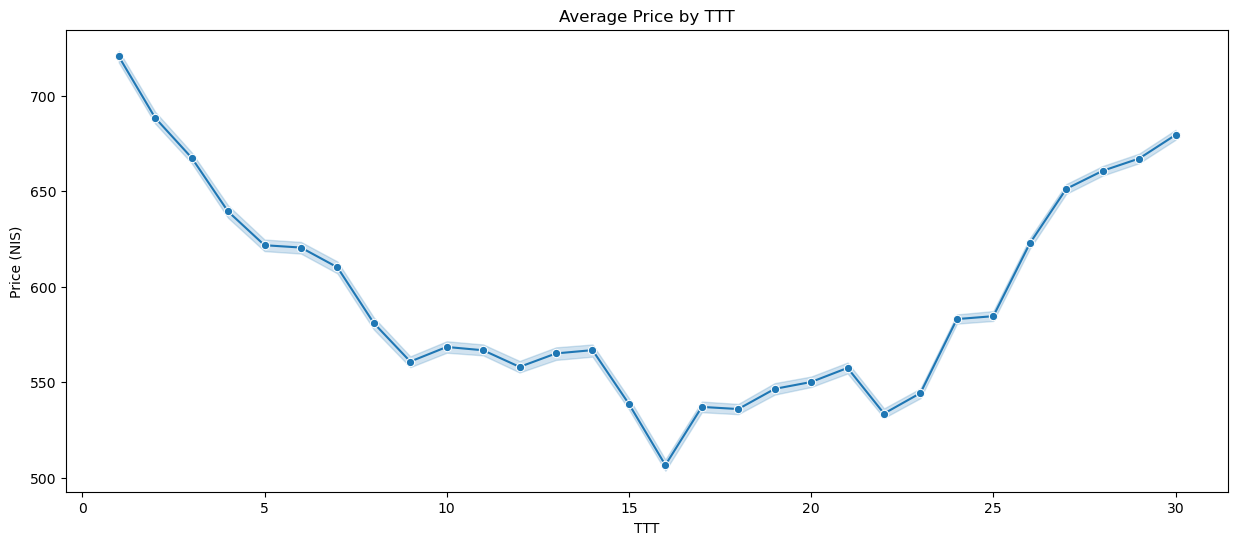

In [107]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=data_copy, x='TTT', y='Price(NIS)', marker="o")  # Adding points to the plot
plt.ylabel("Price (NIS)")
plt.xlabel("TTT")
plt.title("Average Price by TTT")
# plt.grid(True)  # Adding grid lines
plt.show()


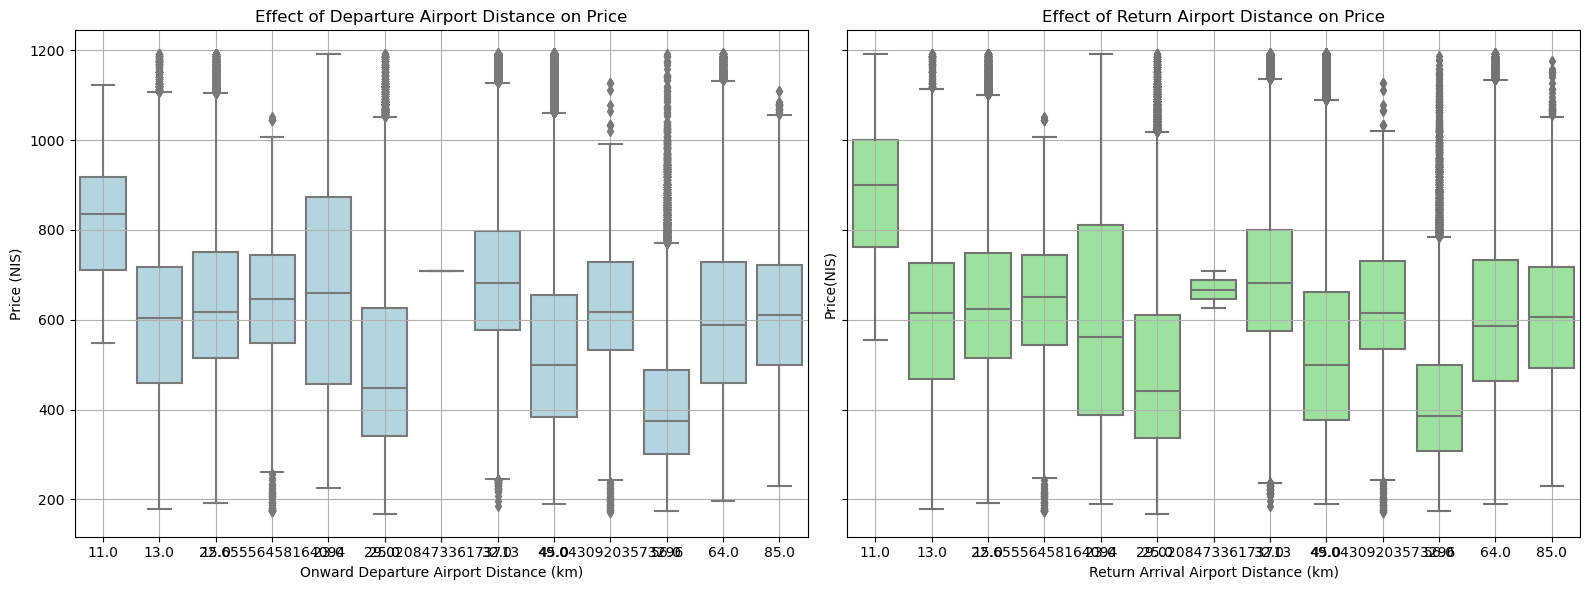

In [109]:
#לתקן!!!
# Create plots with a shared Y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Onward Departure Airport Distance
sns.boxplot(ax=axes[0], x=data_copy['Onward Departure Airport Distance'], y=data_copy['Price(NIS)'], color="lightblue")
axes[0].set_xlabel("Onward Departure Airport Distance (km)")
axes[0].set_ylabel("Price (NIS)")
axes[0].set_title("Effect of Departure Airport Distance on Price")
axes[0].grid(True)

# Plot for Return Arrival Airport Distance
sns.boxplot(ax=axes[1], x=data_copy['Return Arrival Airport Distance'], y=data_copy['Price(NIS)'], color="lightgreen")
axes[1].set_xlabel("Return Arrival Airport Distance (km)")
axes[1].set_title("Effect of Return Airport Distance on Price")
axes[1].grid(True)

# Adjusting the layout of the plots
plt.tight_layout()
plt.show()

4. **Departure Month** – 0.1

6. **Is Weekend Flight** – 0.035
7. **Return Month** – 0.035

9. **Onward Flight Connections** – 0.027
10. **Return Flight Connections** – 0.023 
זה מה שנשאר לי לעשות גרפים!